In [1]:
# Pip is used to install packages/libraries which are not installed by default. The prefix '%' means an install happens in context of only this notebook.
%pip install tensorflow

# A print statement is used in order to confirm if a run of this cell successfully worked.
print("-----\n-----\n> The installation of any necessary package(s) has successfully ran!")

Note: you may need to restart the kernel to use updated packages.
-----
-----
> The installation of any necessary package(s) has successfully ran!


In [2]:
# The software library 'TensorFlow' gets imported.
# TensorFlow is Python-friendly and a common help for projects revolving around machine learning, on account of the multiple functions it has.
import tensorflow

# The Python library 'Joblib' gets imported.
# Joblib offers a 'dump' function which allows the saving of a trained deepfake detection model, specifically into a pickle 'pkl' file.
import joblib

# The Python library 'OS' gets imported.
# OS offers functions that link to and provide access to folder/directory paths, where the sample data used by this notebook is stored at.
import os

# The Python library 'NumPy' gets imported. It is given the alias 'np'.
# NumPy allows work to be done with arrays like expanding one's shape. For example, this lets test images be preprocessed before classification by model.
import numpy as np

# The interface 'Pyplot', which comes from the Python library 'Matplotlib', gets imported. It is given the alias 'plt'.
# Pyplot allows work to be done with plots such as a line plot or scatter plot. For example, this enables creation of graphs to depict model performance.
import matplotlib.pyplot as plt

# The model 'Sequential' and the function 'load_model', from the high-level API 'Keras' (for TensorFlow), get imported.
# A Sequential object allows a given number of layers to be grouped into a custom model. load_model enables model loading from a .h5 file or .keras file.
from tensorflow.keras.models import Sequential, load_model

# From Keras, the layers 'Conv2D', 'MaxPooling2D', 'Dense', and 'Flatten' get imported.
# The layers will be combined via a Sequential model into a custom Convolutional Neural Network. This will be the model that performs deepfake detection.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# From Keras, the class 'ImageDataGenerator' gets imported. 
# An ImageDataGenerator object forms transformed images out of 1 original. If a dataset is small, data augmentation may help models to generalise better.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# From Keras, the functions 'load_img' and 'img_to_array' get imported.
# These functions can load an image file from its path and convert it into a NumPy array. These are needed to predict the classification of a test image.
from tensorflow.keras.utils import load_img, img_to_array

# A print statement is used in order to confirm if a run of this cell successfully worked.
print("-----\n-----\n> The importing of any necessary package(s) has successfully ran!")

-----
-----
> The importing of any necessary package(s) has successfully ran!


In [3]:
# Paths to the folders for general subgroups of the sample data are recorded in variables.
test_images_path = os.path.join(os.getcwd(),"data_sample","test_data")
train_images_path = os.path.join(os.getcwd(),"data_sample","train_data")
validation_images_path = os.path.join(os.getcwd(),"data_sample","validation_data")

# The input shape to be used for training a deepfake detection model is recorded.
# During training, images from the sample data will be resized to 150x150 pixels and treated as having 3 colour channels (i.e. they are RGB image files).
image_resize_height = 150
image_resize_width = 150
input_shape_cnn = (image_resize_height,image_resize_width,3)

# The batch size to be used for training a deepfake detection model, along with the number of classes said model must distinguish between, are recorded.
number_of_classes_cnn = 2
batch_size_cnn = 32

# A print statement is used in order to confirm if a run of this cell successfully worked.
print("-----\n-----\n> The definition of any necessary variable(s) has successfully ran!")

-----
-----
> The definition of any necessary variable(s) has successfully ran!


In [4]:
# This user-defined function will count the number of images in a subfolder for a specific subgroup of sample data.
def count_images_from_sample_data(parameter_path):
    for folder in os.listdir(parameter_path):
        folder_path = os.path.join(str(parameter_path),folder)
        folder_image_count = 0
        for image in os.listdir(folder_path):
            folder_image_count += 1
        print(str(folder_image_count) + " images in\t" + folder_path)

# The above function is repeatedly called, using the paths to folders of general subgroups as arguments.
count_images_from_sample_data(train_images_path)
count_images_from_sample_data(validation_images_path)
count_images_from_sample_data(test_images_path)

# A print statement is used in order to confirm if a run of this cell successfully worked.
print("-----\n-----\n> The counting of data sample images has successfully ran!")

240 images in	C:\Users\Student\6COSC023W_18382079_prototypeIPD\2__notebook_for_ML_classification_model\data_sample\train_data\fake
240 images in	C:\Users\Student\6COSC023W_18382079_prototypeIPD\2__notebook_for_ML_classification_model\data_sample\train_data\real
30 images in	C:\Users\Student\6COSC023W_18382079_prototypeIPD\2__notebook_for_ML_classification_model\data_sample\validation_data\fake
30 images in	C:\Users\Student\6COSC023W_18382079_prototypeIPD\2__notebook_for_ML_classification_model\data_sample\validation_data\real
30 images in	C:\Users\Student\6COSC023W_18382079_prototypeIPD\2__notebook_for_ML_classification_model\data_sample\test_data\fake
30 images in	C:\Users\Student\6COSC023W_18382079_prototypeIPD\2__notebook_for_ML_classification_model\data_sample\test_data\real
-----
-----
> The counting of data sample images has successfully ran!


In [5]:
# An initial ImageDataGenerator object is created, to prepare a configuration for the augmentation of specifically train data.
train_data_generator_base = ImageDataGenerator(
    rescale=1./255  # A rescale parameter normalises RGB image pixel values. Otherwise this value range would be too high for a model to process.
)

# A new generator is created, which generates transformed train data from the appropriate directory/folder path.
train_generator = train_data_generator_base.flow_from_directory(
    train_images_path,                                     # The path to the general folder for train data is passed as an argument here.
    target_size=(image_resize_height,image_resize_width),  # The common target parameters for image resizing dimensions are passed as arguments here.
    batch_size=batch_size_cnn,                             # The common parameter for batch size is passed as an argument here.
    class_mode="categorical",                              # A categorical class mode, which can mean over two classes to distinguish between, is passed.
    shuffle=True,                                          # A true shuffle parameter (meaning data is randomly taken from its directory) is passed.
    seed=3                                                 # A seed parameter (to reproduce the order that data is used for training) is passed.
)

# A print statement is used in order to confirm if a run of this cell successfully worked.
print("-----\n-----\n> The creation of train data generators has successfully ran!")

Found 480 images belonging to 2 classes.
-----
-----
> The creation of train data generators has successfully ran!


In [6]:
# An initial ImageDataGenerator object is created, to prepare a configuration for the augmentation of specifically validation data.
validation_data_generator_base = ImageDataGenerator(
    rescale=1./255  # A rescale parameter normalises RGB image pixel values. Otherwise this value range would be too high for a model to process.
)

# A new generator is created, which generates transformed validation data from the appropriate directory/folder path.
validation_generator = validation_data_generator_base.flow_from_directory(
    validation_images_path,                                # The path to the general folder for validation data is passed as an argument here.
    target_size=(image_resize_height,image_resize_width),  # The common target parameters for image resizing dimensions are passed as arguments here.
    batch_size=batch_size_cnn,                             # The common parameter for batch size is passed as an argument here.
    class_mode="categorical",                              # A categorical class mode, which can mean over two classes to distinguish between, is passed.
    shuffle=False,                                         # A false shuffle parameter (meaning data is not randomly taken from its directory) is passed.
    seed=3                                                 # A seed parameter (to reproduce the order that data is used for validating) is passed.
)

# A print statement is used in order to confirm if a run of this cell successfully worked.
print("-----\n-----\n> The creation of validation data generators has successfully ran!")

Found 60 images belonging to 2 classes.
-----
-----
> The creation of validation data generators has successfully ran!


In [7]:
# An initial ImageDataGenerator object is created, to prepare a configuration for the augmentation of specifically test data.
test_data_generator_base = ImageDataGenerator(
    rescale=1./255  # A rescale parameter normalises RGB image pixel values. Otherwise this value range would be too high for a model to process.
)

# A new generator is created, which generates transformed test data from the appropriate directory/folder path.
test_generator = test_data_generator_base.flow_from_directory(
    test_images_path,                                      # The path to the general folder for test data is passed as an argument here.
    target_size=(image_resize_height,image_resize_width),  # The common target parameters for image resizing dimensions are passed as arguments here.
    batch_size=batch_size_cnn,                             # The common parameter for batch size is passed as an argument here.
    class_mode="categorical",                              # A categorical class mode, which can mean over two classes to distinguish between, is passed.
    shuffle=False,                                         # A false shuffle parameter (meaning data is not randomly taken from its directory) is passed.
    seed=3                                                 # A seed parameter (to reproduce the order that data is used for testing) is passed.
)

# A print statement is used in order to confirm if a run of this cell successfully worked.
print("-----\n-----\n> The creation of test data generators has successfully ran!")

Found 60 images belonging to 2 classes.
-----
-----
> The creation of test data generators has successfully ran!


In [8]:
# A Sequential object is created which will become the deepfake detection model. As stated above its architecture will be a Convolutional Neural Network.
deepfake_detection_model_cnn = Sequential()

# A group of layers are added to the model. They perform feature extraction via the convolution operation and downsampling via the max pooling operation.
deepfake_detection_model_cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape_cnn))
deepfake_detection_model_cnn.add(MaxPooling2D((2, 2)))
deepfake_detection_model_cnn.add(Conv2D(64, (3, 3), activation="relu"))
deepfake_detection_model_cnn.add(MaxPooling2D((2, 2)))
deepfake_detection_model_cnn.add(Conv2D(128, (3, 3), activation="relu"))
deepfake_detection_model_cnn.add(MaxPooling2D((2, 2)))
deepfake_detection_model_cnn.add(Conv2D(128, (3, 3), activation="relu"))
deepfake_detection_model_cnn.add(MaxPooling2D((2, 2)))

# A pair of layers are added to the model. They flatten extracted features into 1 dimension, and then connect all neurones of the last layer to the next.
deepfake_detection_model_cnn.add(Flatten())
deepfake_detection_model_cnn.add(Dense(512, activation="relu"))

# A final dense layer is added to the model. The activation function has been changed from 'ReLU', and is 'Softmax' now.
deepfake_detection_model_cnn.add(Dense(number_of_classes_cnn, activation="softmax"))

# A print statement is used in order to confirm if a run of this cell successfully worked.
print("-----\n-----\n> The creation of the sequential deepfake detection model has successfully ran!")

-----
-----
> The creation of the sequential deepfake detection model has successfully ran!


C:\Users\Student\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# The deepfake detection model now gets compiled.
deepfake_detection_model_cnn.compile(
    loss="categorical_crossentropy",  # The loss function, 'Categorical Cross Entropy' (not Sparse), is useful for multiclass classification models.
    optimizer="rmsprop",              # The optimiser, 'RMSprop' (not Adam), is designed to improve performances and speeds (when training a model).
    metrics=["accuracy"]              # Accuracy is picked as the performance measure for this model.
)

# A print statement is used in order to confirm if a run of this cell successfully worked.
print("-----\n-----\n> The compilation of the sequential deepfake detection model has successfully ran!")

-----
-----
> The compilation of the sequential deepfake detection model has successfully ran!


In [10]:
# Training begins for the deepfake detection model. The training history gets saved also into a variable. 
deepfake_detection_training_history = deepfake_detection_model_cnn.fit(
    train_generator,                                         # The generator which augmented train images is passed as an argument here.
    steps_per_epoch=train_generator.n//batch_size_cnn,       # A number of steps (dividing the size of a generator by the batch size) gets defined.
    epochs=10,                                               # A chosen number of epochs (how many times the model sees the whole dataset) is defined.
    validation_data=validation_generator,                    # The generator which augmented validation images is passed as an argument here.
    validation_steps=validation_generator.n//batch_size_cnn  # Another number of steps (dividing the size of a generator by the batch size) gets defined.
)

# A print statement is used in order to confirm if a run of this cell successfully worked.
print("-----\n-----\n> The training of the sequential deepfake detection model has successfully ran!")

C:\Users\Student\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 430ms/step - accuracy: 0.4722 - loss: 0.8435 - val_accuracy: 0.9375 - val_loss: 0.6767
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 356ms/step - accuracy: 0.5523 - loss: 0.6926 - val_accuracy: 0.4688 - val_loss: 0.6931
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.5677 - loss: 0.6910 - val_accuracy: 0.0625 - val_loss: 0.7628
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 375ms/step - accuracy: 0.5091 - loss: 0.6954 - val_accuracy: 0.8750 - val_loss: 0.5799
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 381ms/step - accuracy: 0.5864 - loss: 0.6768 - val_accuracy: 0.5000 - val_loss: 0.6810
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 360ms/step - accuracy: 0.6629 - loss: 0.6297 - val_accuracy: 0.9375 - val_loss: 0.4627
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 361ms/step - accuracy: 0.6344 - loss: 0.6647 - val_accuracy: 0.5312 - val_loss: 0.6872
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 358ms/step - accuracy: 0.6733 - loss: 0.5814 - val_accuracy: 0.

In [11]:
# The deepfake detection model get saved into a pickle file. Alternatively, it can be saved as a keras or h5 file (though the code is commented out now).
joblib.dump(deepfake_detection_model_cnn,"14.02.2025__Deepfake-Detection-Model__[i].pkl",compress=0,protocol=None,cache_size=None)

# A print statement is used in order to confirm if a run of this cell successfully worked.
print("-----\n-----\n> The saving of the sequential deepfake detection model has successfully ran!")

#deepfake_detection_model_cnn.save("13-14.02.2025__Deepfake-Detection-Model-CNN.keras")
#deepfake_detection_model_cnn.save("13-14.02.2025__Deepfake-Detection-Model-CNN.h5")

#joblib.dump(deepfake_detection_model_cnn,"14.02.2025__Deepfake-Detection-Model.pkl",compress=0,protocol=None,cache_size=None)

-----
-----
> The saving of the sequential deepfake detection model has successfully ran!


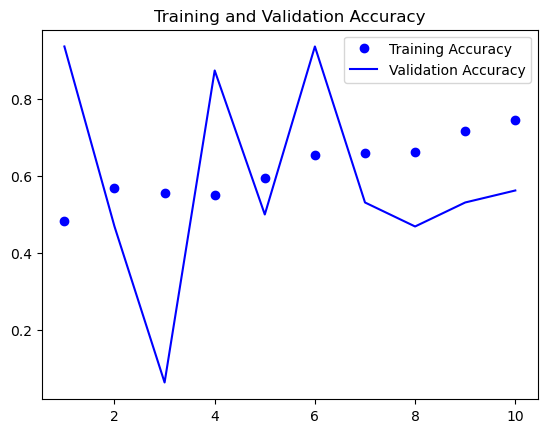

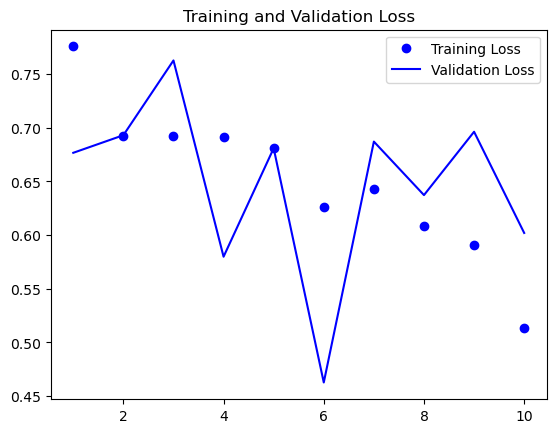

-----
-----
> The creation of graphs (describing the deepfake detection model's performance) has successfully ran!


In [12]:
# The used number of epochs, plus multiple metrics for accuracies/losses, are saved in variables (from the deepfake detection model's training history).
model_accuracy = deepfake_detection_training_history.history['accuracy']
model_validation_accuracy = deepfake_detection_training_history.history['val_accuracy']
model_loss = deepfake_detection_training_history.history['loss']
model_validation_loss = deepfake_detection_training_history.history['val_loss']
epochs = range(1,len(model_accuracy)+ 1)

# A graph is plotted depicting the fluctuation of accuracy and validation accuracy, while training the deepfake detection model.
plt.plot(epochs, model_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, model_validation_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

# A graph is plotted depicting the fluctuation of loss and validation loss, while training the deepfake detection model.
plt.plot(epochs, model_loss, 'bo', label='Training Loss')
plt.plot(epochs, model_validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# A print statement is used in order to confirm if a run of this cell successfully worked.
print("-----\n-----\n> The creation of graphs (describing the deepfake detection model's performance) has successfully ran!")

In [13]:
# Pip installs more libraries, including graphviz (not shown here but installed on Conda terminal). They allow diagrams to be made of the deepfake model.
%pip install pydot-ng
%pip install pydot==2.0.0
%pip install pydotplus

# A print statement is used in order to confirm if a run of this cell successfully worked.
print("-----\n-----\n> The installation of more packages has successfully ran!")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
-----
-----
> The installation of more packages has successfully ran!


In [14]:
# The pickle file for the saved deepfake detection model gets reloaded by the library Joblib.
model_cnn_loaded = joblib.load("14.02.2025__Deepfake-Detection-Model__[i].pkl",mmap_mode=None)

# A print statement is used in order to confirm if a run of this cell successfully worked.
print("-----\n-----\n> The loading of the deepfake detection model has successfully ran!")

#model_cnn_loaded = joblib.load("14.02.2025__Deepfake-Detection-Model.pkl",mmap_mode=None)

-----
-----
> The loading of the deepfake detection model has successfully ran!


In [15]:
# Two tensorflow functions are imported - they can convert and save this notebook model as a dot format (compatible with the packages making a diagram).
from tensorflow.keras.utils import plot_model, model_to_dot

# This function creates a diagram representing the structure of the deepfake detection model, and saves said diagram into a png image file.
plot_model(model_cnn_loaded,to_file="14.02.2025__Deepfake-Detection-Model-CNN__Architecture__[i].png",show_shapes=True,show_layer_names=True)

# A print statement is used in order to confirm if a run of this cell successfully worked.
print("-----\n-----\n> The creation of a diagram for the deepfake detection model has successfully ran!")

#plot_model(model_cnn_loaded,to_file="14.02.2025__Deepfake-Detection-Model-CNN__Architecture.png",show_shapes=True,show_layer_names=True)

-----
-----
> The creation of a diagram for the deepfake detection model has successfully ran!
